In [1]:
import pandas as pd
import numpy as np
from leela.database.database import Database
import matplotlib.pyplot as plt

In [2]:
fannie_mae_sf_sample = pd.read_csv(r"C:\Projects\GitHub\Leela\data\Fannie\sf-loan-performance-data-sample_orig.csv", delimiter="|")
fannie_mae_sf_sample.columns = Database.query_db("select * from raw_fannie limit 1").columns


-----------------------------
PostgreSQL server information
-----------------------------
You are connected to -  ('PostgreSQL 14.2, compiled by Visual C++ build 1914, 64-bit',) 



c:\Users\evanl\anaconda3\envs\leela\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


In [3]:
fannie_mae_sf_sample[["upb_at_issuance"]].isna().sum()

upb_at_issuance    756
dtype: int64

In [4]:
print(list(fannie_mae_sf_sample.columns))

['reference_pool_id', 'loan_id', 'monthly_reporting_period', 'channel', 'seller_name', 'servicer_name', 'master_servicer', 'original_interest_rate', 'current_interest_rate', 'original_upb', 'upb_at_issuance', 'current_actual_upb', 'original_loan_term', 'origination_date', 'first_payment_date', 'loan_age', 'remaining_months_to_legal_maturity', 'remaining_months_to_maturitry', 'maturity_date', 'oltv', 'ocltv', 'number_of_borrowers', 'dti', 'borrower_credit_score_at_origination', 'coborrower_credit_score_at_origination', 'first_time_buyer_flag', 'loan_purpose', 'property_type', 'number_of_units', 'occupancy_status', 'property_state', 'msa', 'zip_code_short', 'mortgage_insurance_pct', 'amortization_type', 'prepayment_penalty_indicator', 'interest_only_indicator', 'interest_only_first_prin_and_int_pay_dt', 'months_to_amortization', 'current_loan_delinq_status', 'loan_payment_history', 'modification_flag', 'mortgage_insurance_cancellation_indicator', 'zero_balance_code', 'zero_balance_effect

In [5]:
# fannie_mae_sf_sample[["scheduled_principcal_current"]].isna().sum()
fannie_mae_sf_sample[["scheduled_principcal_current", "total_principal_current", "unscheduled_principal_current"]]

,scheduled_principcal_current,total_principal_current,unscheduled_principal_current
0,NaN,NaN,NaN
1,NaN,NaN,NaN
2,NaN,NaN,NaN
3,NaN,NaN,NaN
4,NaN,NaN,NaN
...,...,...,...
751,NaN,NaN,NaN
752,NaN,NaN,NaN
753,NaN,NaN,NaN
754,NaN,317.64,NaN


In [17]:
# temp = Database.query_db("select * from fannie_processed where loan_id = '000128090408'")
# temp = Database.query_db("select * from fannie_processed order by random() limit 1")
temp = Database.query_db("""select * from fannie_processed 
                                where monthly_reporting_period = '2021-07-01'
                            and loan_age > 21
                        order by random () limit 1""")
temp


-----------------------------
PostgreSQL server information
-----------------------------
You are connected to -  ('PostgreSQL 14.2, compiled by Visual C++ build 1914, 64-bit',) 



c:\Users\evanl\anaconda3\envs\leela\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,reference_pool_id,loan_id,monthly_reporting_period,channel,seller_name,servicer_name,master_servicer,original_interest_rate,current_interest_rate,original_upb,...,mortgage_margin,arm_balloon_indicator,arm_plan_number,borrower_assistance_plan,hltv_refi_option_indicator,deal_name,repurchase_make_whole_proceeds_flag,alternative_delinq_resolution,alternative_delinq_resolution_count,total_deferral_amount
0,None,417921952758,2021-07-01,C,Other,PennyMac Corp.,None,3.5,3.5,118000.0,...,None,None,None,7,N,None,None,7,None,None


In [22]:
temp = Database.query_db("""select * from fannie_processed where loan_id = '417921952758' order by monthly_reporting_period """)
temp.head()


-----------------------------
PostgreSQL server information
-----------------------------
You are connected to -  ('PostgreSQL 14.2, compiled by Visual C++ build 1914, 64-bit',) 



c:\Users\evanl\anaconda3\envs\leela\lib\site-packages\pandas\io\sql.py:761: UserWarning: pandas only support SQLAlchemy connectable(engine/connection) ordatabase string URI or sqlite3 DBAPI2 connectionother DBAPI2 objects are not tested, please consider using SQLAlchemy
  warnings.warn(


,reference_pool_id,loan_id,monthly_reporting_period,channel,seller_name,servicer_name,master_servicer,original_interest_rate,current_interest_rate,original_upb,...,mortgage_margin,arm_balloon_indicator,arm_plan_number,borrower_assistance_plan,hltv_refi_option_indicator,deal_name,repurchase_make_whole_proceeds_flag,alternative_delinq_resolution,alternative_delinq_resolution_count,total_deferral_amount
0,None,417921952758,2017-10-01,C,Other,Pennymac Corp.,None,3.5,3.5,118000.0,...,None,None,None,None,N,None,None,None,None,None
1,None,417921952758,2017-11-01,C,Other,Pennymac Corp.,None,3.5,3.5,118000.0,...,None,None,None,None,N,None,None,None,None,None
2,None,417921952758,2017-12-01,C,Other,Pennymac Corp.,None,3.5,3.5,118000.0,...,None,None,None,None,N,None,None,None,None,None
3,None,417921952758,2018-01-01,C,Other,Pennymac Corp.,None,3.5,3.5,118000.0,...,None,None,None,None,N,None,None,None,None,None
4,None,417921952758,2018-02-01,C,Other,Pennymac Corp.,None,3.5,3.5,118000.0,...,None,None,None,None,N,None,None,None,None,None


['reference_pool_id', 'loan_id', 'monthly_reporting_period', 'channel', 'seller_name', 'servicer_name', 'master_servicer', 'original_interest_rate', 'current_interest_rate', 'original_upb', 'upb_at_issuance', 'current_actual_upb', 'original_loan_term', 'origination_date', 'first_payment_date', 'loan_age', 'remaining_months_to_legal_maturity', 'remaining_months_to_maturitry', 'maturity_date', 'oltv', 'ocltv', 'number_of_borrowers', 'dti', 'borrower_credit_score_at_origination', 'coborrower_credit_score_at_origination', 'first_time_buyer_flag', 'loan_purpose', 'property_type', 'number_of_units', 'occupancy_status', 'property_state', 'msa', 'zip_code_short', 'mortgage_insurance_pct', 'amortization_type', 'prepayment_penalty_indicator', 'interest_only_indicator', 'interest_only_first_prin_and_int_pay_dt', 'months_to_amortization', 'current_loan_delinq_status', 'loan_payment_history', 'modification_flag', 'mortgage_insurance_cancellation_indicator', 'zero_balance_code', 'zero_balance_effect

<AxesSubplot:xlabel='monthly_reporting_period'>

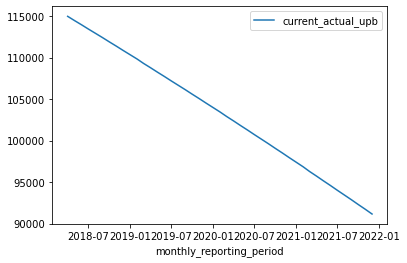

In [29]:
print(list(temp.columns))
temp.set_index("monthly_reporting_period")[["current_actual_upb",
                                            "unscheduled_principal_current", 
                                            "",
                                            ""
                                            ]].iloc[6:]
# temp.set_index("monthly_reporting_period")[["current_actual_upb",]].iloc[6:].plot()

In [8]:
# data = pd.read_csv(r"C:\Projects\GitHub\Leela\leela\research\Nikita\data\sample.csv",index_col=0)
# data = Database.query_db("select * from fannie_processed where loan_id = '000097568237'")
# data = data.set_index("monthly_reporting_period").sort_index()
# data = pd.read_csv(r"C:\Projects\GitHub\Leela\leela\research\Nikita\data\30_yr.csv", index_col=0)
# data = data.set_index("monthly_reporting_period")

In [9]:
# data["upb_at_issuance"].isna().sum()

In [10]:
# dropped_columns = ["reference_pool_id", "master_servicer", 
                #   "mortgage_margin", 'upb_at_issuance', 'channel', 'seller_name']
# data[[x for x in data.columns if x not in dropped_columns]]

In [11]:
# print(list(data.columns))

In [12]:
# sample = data[data["loan_id"] == 99761926].copy().sort_index()
# smm_columns = ["current_actual_upb", "original_upb", "scheduled_principcal_current", "total_principal_current", "unscheduled_principal_current"]
# sample[smm_columns]

In [13]:
# def get_null_row_counts(data, column):
#     print("NaN Row Count: ", data["scheduled_principcal_current"].isna().sum())
#     print("Total Row Count: ", len(data))

# print(data["scheduled_principcal_current"].isna().sum())
# print(len(data))

In [14]:
# data["mortgage_insurance_pct"].groupby("monthly_reporting_period").mean().plot()